In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from tensorflow.examples.tutorials.mnist import input_data
mnist2 = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [24]:
from tensorflow.keras.datasets import mnist
#Importing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_vector_size = 28*28
#Normalization
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [25]:
#Parameters
learning_rate = 0.001
training_epoch = 250
N = 784
n_hidden_1 = 392
n_hidden_2 = 196
n_hidden_3 = 2
n_hidden_4 = 392
batch_size = 50
n_input = N
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder("float",[None,n_input])
test_examples = 1000
import numpy as np
random_indexs = np.random.randint(low=0,high=len(x_test)-1,size = test_examples)

In [26]:
#1st Hidden layer N/2
weight_hidden_1 = tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.1))
bias_hidden_1   = tf.Variable(tf.constant(0.1,shape = [n_hidden_1]))
output_hidden_1 = tf.nn.relu(tf.add(tf.matmul(x,weight_hidden_1),bias_hidden_1))

In [27]:
#2nd Hidden Layer N/4
weight_hidden_2 = tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.1))
bias_hidden_2   = tf.Variable(tf.constant(0.1,shape=[n_hidden_2]))
output_hidden_2 = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_1,weight_hidden_2),bias_hidden_2))

In [28]:
#3rd Hidden Layer 2
weight_hidden_3 = tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.1))
bias_hidden_3   = tf.Variable(tf.constant(0.1,shape=[n_hidden_3]))
output_hidden_3 = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_2,weight_hidden_3),bias_hidden_3))

In [29]:
#4th Hidden Layer N/2
weight_hidden_4 = tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4],stddev=0.1))
bias_hidden_4   = tf.Variable(tf.constant(0.1,shape=[n_hidden_4]))
output_hidden_4 = tf.nn.relu(tf.add(tf.matmul(output_hidden_3,weight_hidden_4),bias_hidden_4))

In [30]:
#Output Layer N
weight_output = tf.Variable(tf.truncated_normal([n_hidden_4,n_input],stddev=0.1))
bias_output   = tf.Variable(tf.constant(0.1,shape=[n_input]))
output_output = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_4,weight_output),bias_output))

In [31]:
loss = tf.reduce_mean(tf.squared_difference(y,output_output))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

In [32]:
test_image = tf.placeholder("float",[28,28])
test = tf.reshape(test_image,[-1])

epochs completed 100.0 %


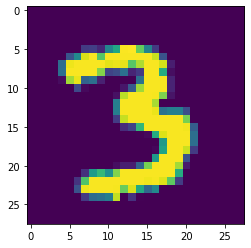

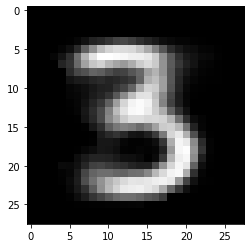

In [33]:
init = tf.global_variables_initializer()
error_list=[]
y_axis = []
x_axis = []
label  = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epoch):        
        total_batch = int(mnist2.train.num_examples / batch_size)             
        for i in range(total_batch):                     
            batch_xs, batch_ys = mnist2.train.next_batch(batch_size)                  
            sess.run(optimizer,feed_dict={
                x:batch_xs,
                y:batch_xs
            })
        error_list.append(sess.run(loss,feed_dict={
            x: mnist2.test.images,
            y: mnist2.test.images
        }))
        clear_output(wait=True)
        print("epochs completed",((epoch+1)/training_epoch)*100,"%")        
        plt.imshow(mnist2.test.images[500].reshape(28,28))
        plt.show()
        a = sess.run(output_output,feed_dict={
                x:[mnist2.test.images[500]]
            })    
        a = a.reshape(28,28)
        plt.imshow(a,cmap="gray")
        plt.show()
    
    
    
    for i in range(test_examples):
        
        features = sess.run(output_hidden_3,feed_dict={
            x:[x_test[i]]
        })                
        
        y_axis.append(features[0][0])
        x_axis.append(features[0][1])
        label.append(y_test[i]*0.1)
    
    
           
    

      Dim_1     Dim_2  label
0  0.937155  0.808771    7.0
1  0.506449  0.017471    2.0
2  0.935017  0.098612    1.0
3  0.072331  0.153027    0.0
4  0.167737  0.744450    4.0


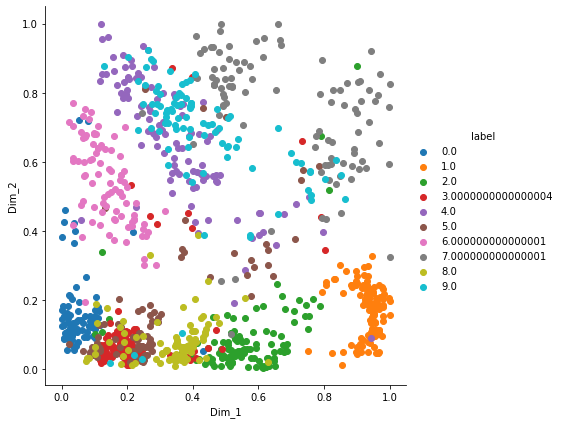

In [34]:
import pandas as pd
data = {"Dim_1": x_axis,
       "Dim_2": y_axis,
       "label": np.array(label)*10}
df = pd.DataFrame(data)
print(df.head())
import seaborn as sns
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

0.03619075


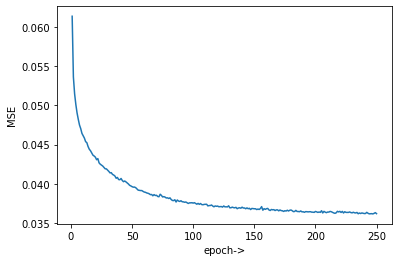

In [35]:
epoch_list = []
for i in range(training_epoch):
    epoch_list.append(i+1)
plt.plot(epoch_list,error_list)
plt.xlabel("epoch->")
plt.ylabel("MSE")
print(error_list[len(error_list)-1])